# Exploratory data analysis for Kaggle Airbus Ship Detection

In [1]:
import os, sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# Root directory of the project
ROOT_DIR = os.path.abspath("../")
sys.path.append(ROOT_DIR)  # To find local version of the library

from ShipDataset import ShipDataset

img_dir = "../input/train/"
csv_file = "../input/train_ship_segmentations.csv"

In [2]:
train_set = ShipDataset(csv_file, img_dir)

print("{} images are available".format(len(train_set)))

104070 images are available


In [3]:
# try load a couple of images
imgs = []
masks = []

for i in range(1000,1010):
    img, mask = train_set[i]
    imgs.append(img)
    masks.append(mask)
print("{}/{} images are loaded from dataset".format(len(imgs), len(masks)))


10/10 images are loaded from dataset


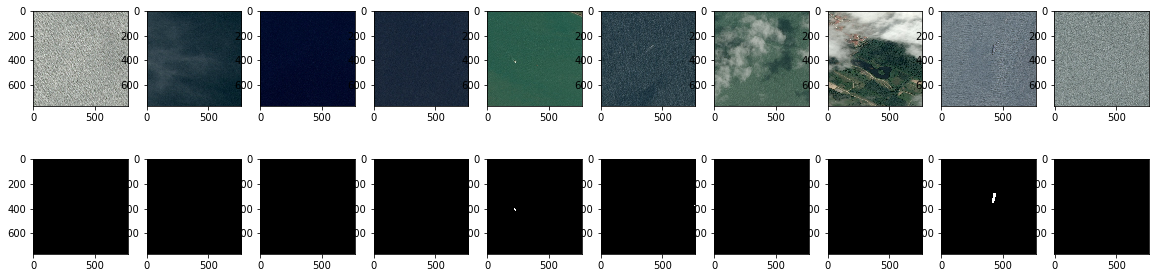

In [4]:
# visualize
from ShipUtils import PlotShipImages

PlotShipImages(imgs, masks, size = 20)


ImageId                                      EncodedPixels
0  00003e153.jpg                                                NaN
1  000155de5.jpg  264661 17 265429 33 266197 33 266965 33 267733...
2  00021ddc3.jpg  101361 1 102128 3 102896 4 103663 6 104430 9 1...
3  00021ddc3.jpg  95225 2 95992 5 96760 7 97527 9 98294 9 99062 ...
4  00021ddc3.jpg  74444 4 75212 4 75980 4 76748 4 77517 3 78285 ...

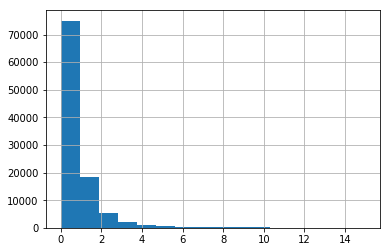

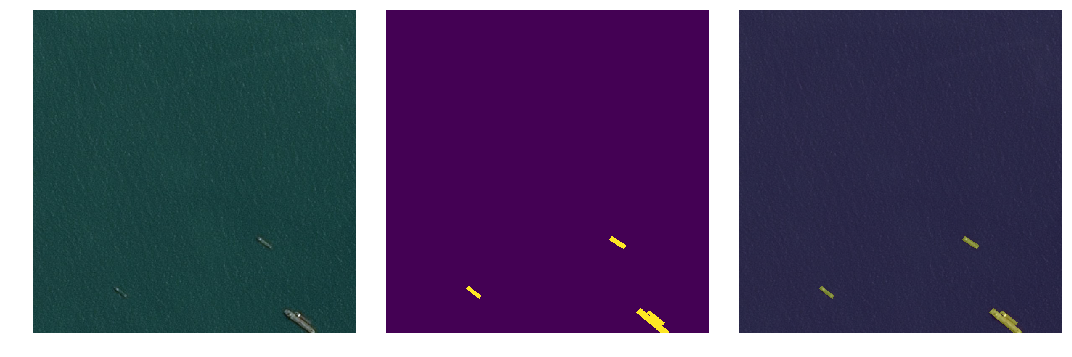

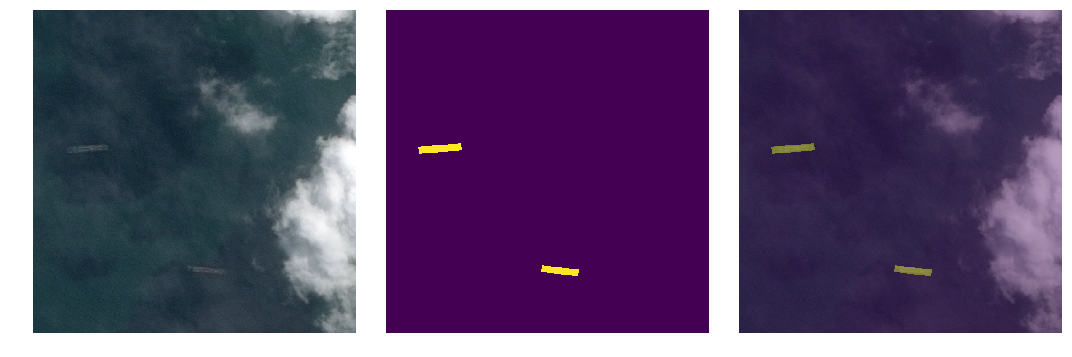

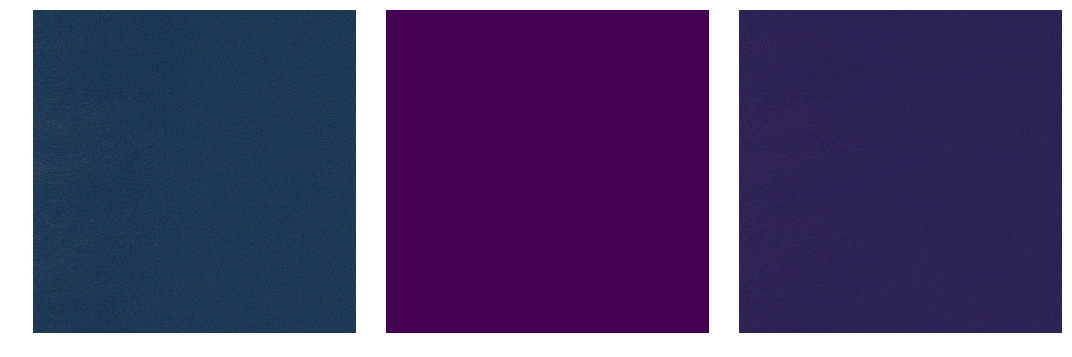

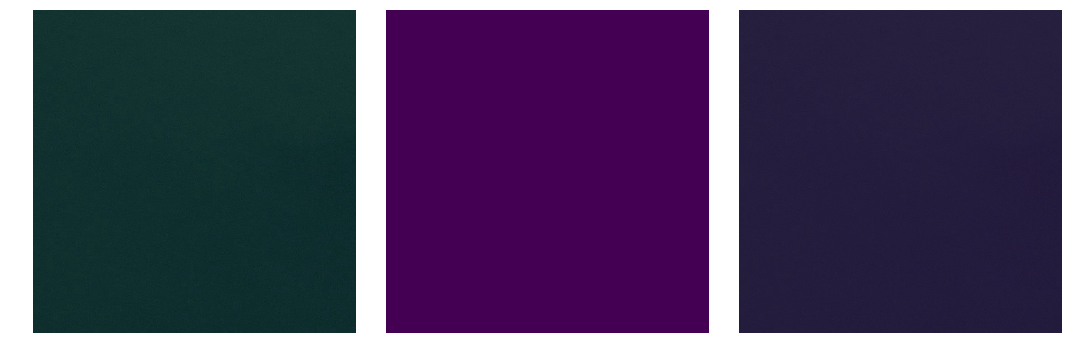

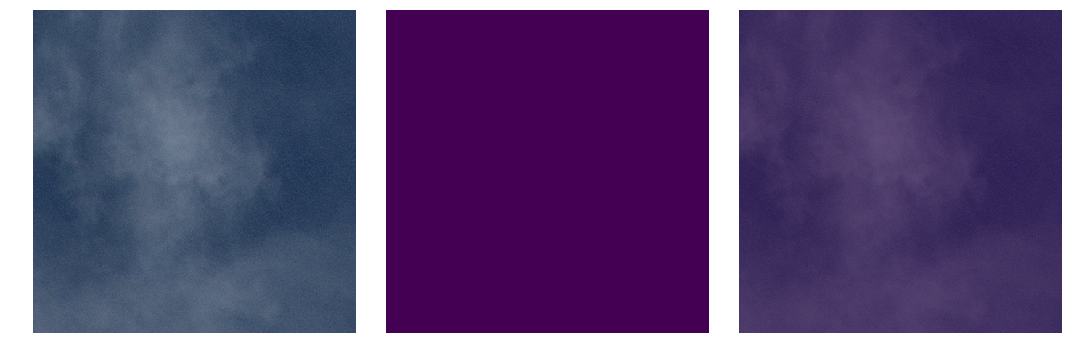

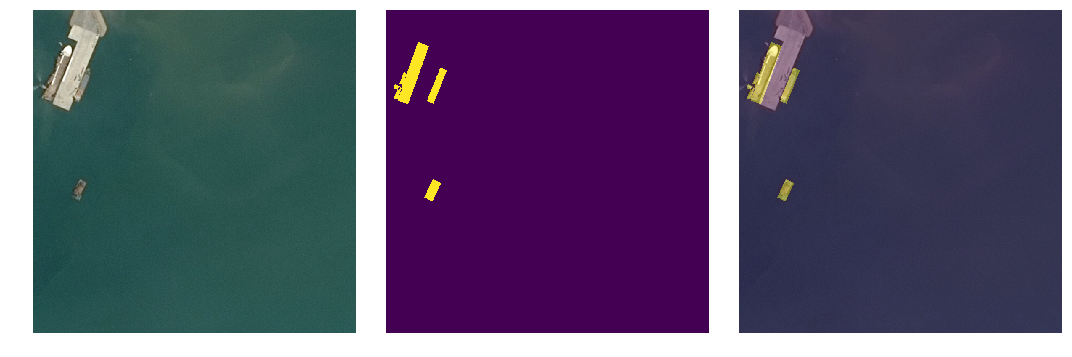

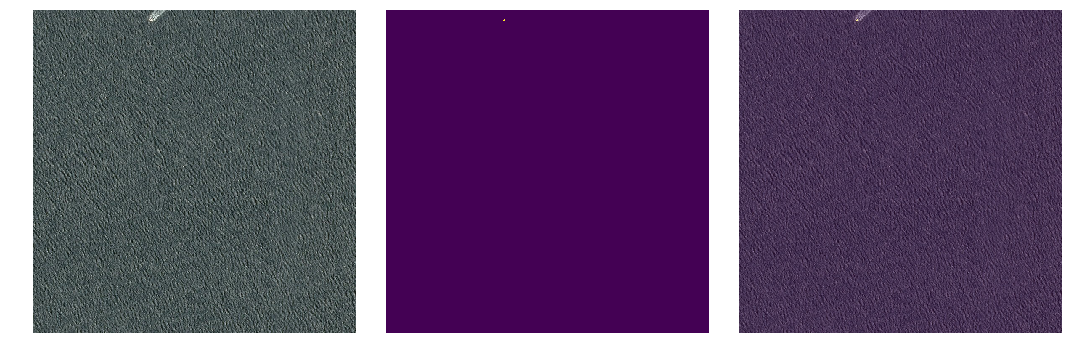

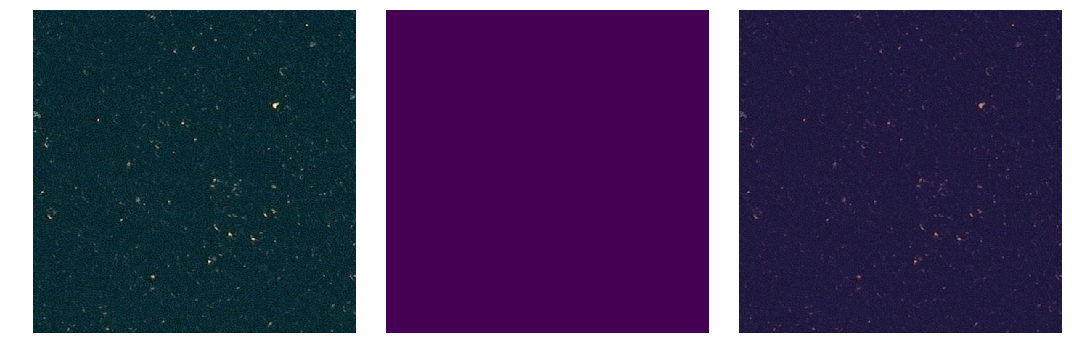

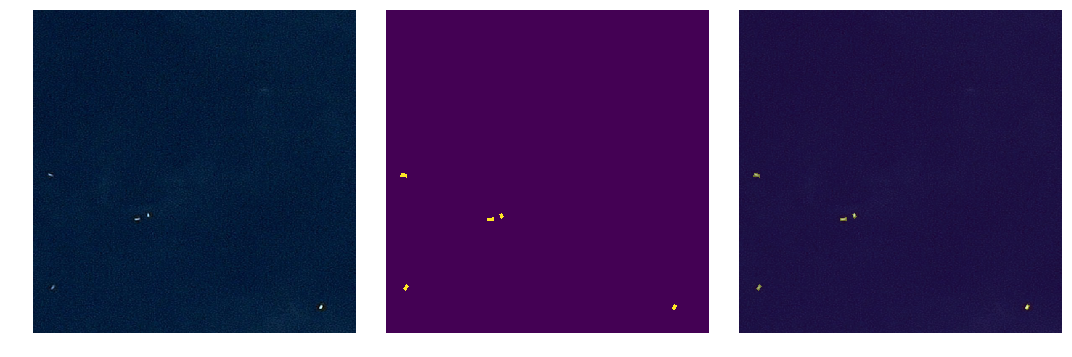

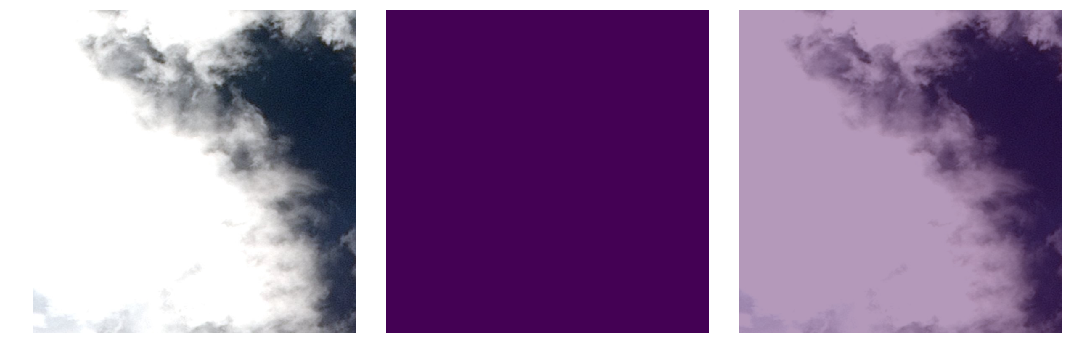

In [6]:
from ShipUtils import PlotShipMask

# visualize mask
masks = pd.read_csv('../input/train_ship_segmentations.csv')
display(masks.head())

# how many ships in each image?
ship_counts = masks.ImageId.value_counts()
ship_counts.loc[masks.ImageId[masks.EncodedPixels.apply(type)==float]] = 0
plt.figure()
display(ship_counts.hist(bins=16))

# 10 random images
ImageIds = masks['ImageId'].sample(10)
for imgid in ImageIds:
    PlotShipMask(imgid, masks)

